# DATA-SCIENCE Proyecto 2
## Benjamin Abraham Nieto
### "Dataset Properaty & Modelos Avanzados"

## Proposito
En este proyecto se retoma el datset del proyecto uno (***DS_Proyecto_01_Datos_Properati.csv***) y la misma problematica que es obtener el mejor modelo de machine learning como tasador de precios, con diferecnia en que buscamos que en esta version (**v 2.0**) nuestro predictor alcance un nuevo nivel de estimacion mejorado implementando nuevas tecnicas, modelos, variables etc.

### Objetivos
Como objetivos a destacar buscaremos lo siguiente:
- Optimizacion del modelo o cambio de este (Mejores resultados al predecir)
- Mejoras en nuestros datos (Modificacion del dataset para tener resultados mas precisos)
- Exploracion de nuevos errores al mejorar el modelo

### Analisis Exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataFrame = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
dataFrame.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Lo primero que necesitamos observar es la composiscion de nuestro data frame para saber si es optimo para utilizarlo o si sera necesario hacer cambios en el para que provea la mayor cantidad de datos a nuestro modelo

In [24]:
data_desc = dataFrame.info()
print(data_desc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

Despues de obeservar de manera general los datos con los que vamos a trabajar y la cantidad de instancias que contiene debemos saber cuantos datos faltantes tiene el data frame para evitar irregularidades e inconsistencias en el modelo posteriormente

In [25]:
missing_values = dataFrame.isna().sum()
print(missing_values)

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [26]:
total = np.product(dataFrame.shape)
total_missing = missing_values.sum()
percent = total_missing/total*100

print(percent, "%")

2.439656348015819 %


Tan solo tenemos un ***2.43% de valores faltantes*** en nuestro datos lo cual es poco aunque estos valores se encuentran en varaibles que usaremos mas tarde por lo cual sera necesario quitar estos valores y posteriormente susutituirlos.

Procederemos seleccionando las variables a utilizar y viendo la distribucion.

<ipython-input-6-7ad3fe6d5605>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_l2, rotation=60)
<ipython-input-6-7ad3fe6d5605>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_l3, rotation=90)


<Figure size 1440x864 with 0 Axes>

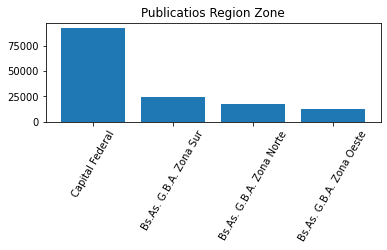

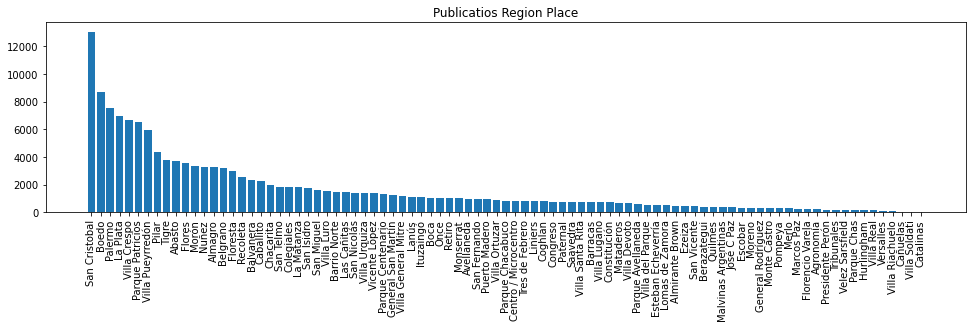

In [6]:
#════════════════ Publications region (l2) ══════════════
plt.figure(figsize=(20, 12))
fig, ax = plt.subplots()

x_l2 = dataFrame['l2'].unique()
y_l2 = dataFrame['l2'].value_counts().tolist()
ax = plt.subplot(2,1,1)
plt.bar(x_l2, y_l2)
plt.title('Publicatios Region Zone')
ax.set_xticklabels(x_l2, rotation=60)

#════════════════ Pucblications region (l3) ══════════════
plt.figure(figsize = (5.5*3,10.0))
x_l3 = dataFrame['l3'].unique()#TO MANY VALUES
y_l3 = dataFrame['l3'].value_counts().tolist()
ax = plt.subplot(2, 1, 2)  
plt.bar(x_l3, y_l3)
plt.title('Publicatios Region Place')
ax.set_xticklabels(x_l3, rotation=90)

plt.subplots_adjust(wspace=0.85, bottom=0.3)
plt.show()

Como queremos tener los mejores resultado en el entrenamiento es necesario que tengamos las mayor catidad de datos posibles por lo cual se ha decidido trabajar con Capital Federal como nuestra principal fuente de datos.
Aunque podriamos tambien usar algunas de las otras zonas para nuestros ensambles y asi mejorar nuestro modelo

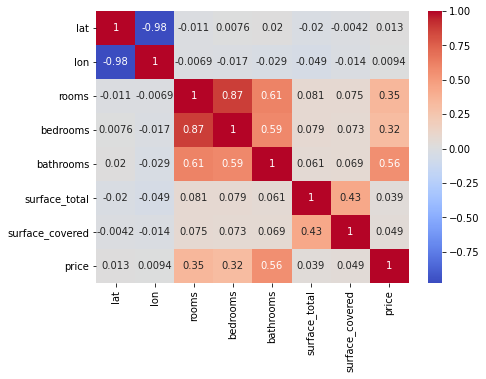

In [27]:
corr_values = dataFrame.corr()
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_values,
                cmap='coolwarm',
                annot=True)

Lo primero a hacer es un mapa de correlacion porque como anteriormente vimos hay valores faltantes en los datos principales a usar (**surface_covered, surface_total, etc**) y en el mapa nos damos cuenta que no tenemos buenas relaciones entre los datos por lo cual haremos una ***Imoutacion de valores faltantes*** antes de filtrar y asi conservar la mayor cantidad de datos posibles.

###  Analisis de datos pre-filtrado

<AxesSubplot:xlabel='surface_total', ylabel='Count'>

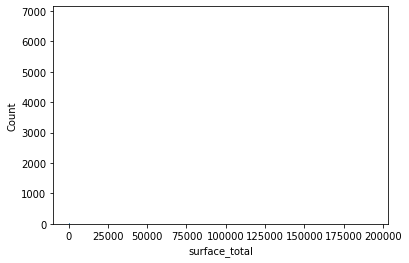

In [28]:
#Filter to surface_total
sns.histplot(dataFrame.surface_total)

<AxesSubplot:xlabel='price', ylabel='Count'>

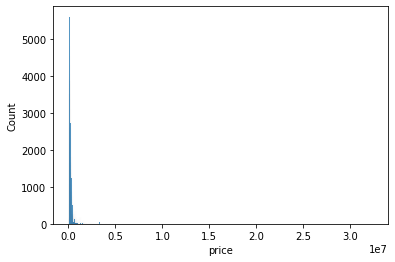

In [29]:
#Filter to price
sns.histplot(dataFrame.price)

En estos histogramas no es posible observar realemte ningun valor debido a que tenemos muchos datos y hay una dispercion elevada en ellos, muchos datos pero tambien muchos valores atipicos que no nos permiten ver con que datos en realidad contamos.

### Imputacion de valores faltantes
Como se menciono anteriormente antes de hacer la filtracion de datos lo que haremos es imputar los valores faltantes por lo cual lo primero a hacer es consguir un valor para imputar.

Buscaremos dar valores nuevos a ***surface_covered, surface_total y bathrooms*** porque son algunas de las instancias con valores faltantes pero tambien porque pueden tener una gran influencia en determinar el precio de la propiedad que es el objetivo que tenemos.

Para obtener los valores en el caso de **surface_covered y surface_total** usaremos la **mediana** de todos los datos de estas instancias y asi determinaremos el valor a imputar segun el tipo de propiedad que tenga un valor nulo.
Y en el caso de **bathrooms** usaremos la **moda** porque no queremos tener valores incompletos es decir, valores decimales o flotantes, entonces buscaremos la moda de bathrooms para cada tipo de propiedad y de esta manera imputremos los valores. 

In [3]:
mean_surface = dataFrame[['surface_total','property_type']].groupby('property_type').agg(pd.Series.median)
mean_surface.to_dict()

{'surface_total': {'Casa': 300.0,
  'Casa de campo': 2462.0,
  'Cochera': 13.5,
  'Departamento': 67.0,
  'Depósito': 480.0,
  'Local comercial': 106.5,
  'Lote': 520.0,
  'Oficina': 65.0,
  'Otro': 710.0,
  'PH': 106.0}}

In [4]:
mean_surface_covered = dataFrame[['surface_covered','property_type']].groupby('property_type').agg(pd.Series.median)
mean_surface_covered.to_dict()

{'surface_covered': {'Casa': 160.0,
  'Casa de campo': 161.5,
  'Cochera': 13.5,
  'Departamento': 60.0,
  'Depósito': 405.0,
  'Local comercial': 90.0,
  'Lote': 169.0,
  'Oficina': 57.0,
  'Otro': 144.0,
  'PH': 80.0}}

In [5]:
mean_bathrooms = dataFrame[['property_type','bathrooms']].groupby('property_type').agg(pd.Series.mode)
mean_bathrooms.to_dict()

{'bathrooms': {'Casa': 2.0,
  'Casa de campo': 2.0,
  'Cochera': 1.0,
  'Departamento': 1.0,
  'Depósito': 1.0,
  'Local comercial': 1.0,
  'Lote': 1.0,
  'Oficina': 1.0,
  'Otro': 2.0,
  'PH': 1.0}}

In [6]:
dataFrame = dataFrame.set_index("property_type")
dataFrame.surface_total.fillna(mean_surface.to_dict()["surface_total"], inplace=True)
dataFrame.surface_covered.fillna(mean_surface_covered.to_dict()["surface_covered"], inplace=True)
dataFrame.bathrooms.fillna(mean_bathrooms.to_dict()["bathrooms"], inplace=True)
dataFrame.reset_index(inplace=True)
dataFrame.head()

,property_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,operation_type
0,Departamento,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Venta
1,PH,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,Venta
2,PH,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",Venta
3,PH,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,Venta
4,PH,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,Venta


Como podemos observar despues de imputar lo valores estos dejan de ser faltantes en nuestro data frame y ahora podemos proceder a hacer una filtracion edacuerdo a lo que buscamos.

In [34]:
missing_values = dataFrame.isna().sum()
print(missing_values)

property_type         0
start_date            0
end_date              0
created_on            0
lat                9925
lon                9959
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
operation_type        0
dtype: int64


Cabe destacar que no imputamos valores para **lat y lon** porque se requiere un metodo diferente para hacer y no pretendemos utilizarlas en estre proyecto como variables del predictor.

### Filtrado

In [7]:
#Data filter
filter_data = dataFrame[(dataFrame['price'] <= 2500000) & (dataFrame['surface_total'] >= 15) & (dataFrame['surface_total'] <= 800)]
adjust_data = filter_data[(filter_data['surface_covered'] <= filter_data['surface_total']) & (filter_data['l2'] == 'Capital Federal')]
adjust_data.head()

,property_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,operation_type
0,Departamento,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Venta
1,PH,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,Venta
2,PH,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",Venta
3,PH,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,Venta
5,PH,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",Venta


El filtro aplicado reduce muchos valores de los datos sin embargo le da una mayor fidelidad a los algoritmos a utilizar y de esta forma nuestra predicciones seran mejores y mas efectivas.

##### Filtros aplicados
- ***Precio menor o igual a 2,500,000 DLS***: Usamos este filtro porque valores mas elevados a este son atipicos, es decir la mayoria de los datos recopilados estan en este rango (0 - 2,500,000) por lo cual al quitar valores atipicos podemos ganar mayor precision.
- ***Filtrado de superficie***: Con este filtro descartamos las propiedades mas pequeñas (menores a 15 m²) y las mas grandes (mayores a 800 m²) ya que los clientes finales segun los datos recabados en este dataset prefieren propiedades de tamaños mas moderados, es decir dimensiones de casas y apartamentos.
- ***Filtro de ajuste en superficie***: Aplicamos un filtro a las dimensiones (aparte de los anteriormente mencionados) ya que pudo haber errores al insertar o recolectar datos por lo cual la superficie cubierta no púede superar a la superficie total, es decir el area de la vivienda no puede ser mayor al area total del terreno.
- ***Filtro de zona***: La zona en la que trabajaremos principalmente sera Capital Federal debido a que la mayor cantidad de datos provieen de aqui

### Analisis de datos pos-filtrado

<AxesSubplot:xlabel='surface_total', ylabel='Count'>

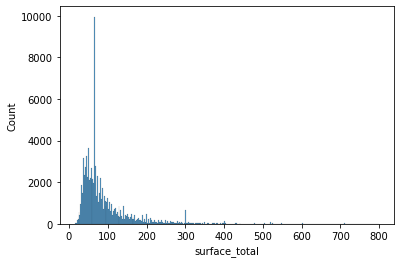

In [36]:
#Pos-filter to surface_total
sns.histplot(adjust_data.surface_total)

<AxesSubplot:xlabel='price', ylabel='Count'>

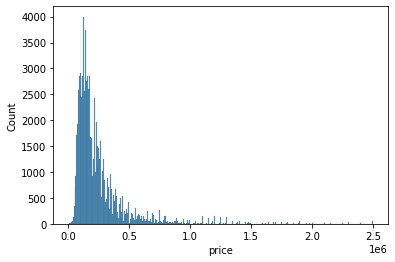

In [37]:
#Pos-filter to price
sns.histplot(adjust_data.price)

Los siguientes histogramas son muy claros por lo que podemos darnos cuenta que nuestros datos en su mayoria estan cercanos y la dispresion es muy poca a diferencia de nuestra **"data cruda"** que teniamos en el pre-filtrado.

Ahora comprobamos las relaciones entre instancias.

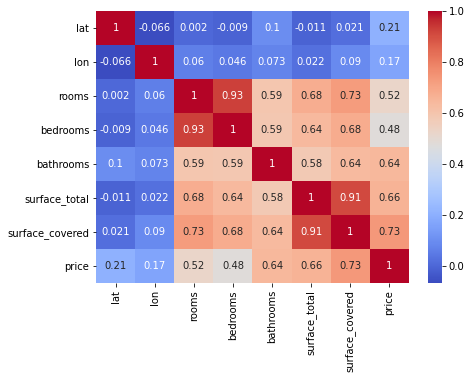

In [38]:
corr_adjust_values = adjust_data.corr()
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_adjust_values,
                cmap='coolwarm',
                annot=True)

Como vemos a diferencia de nuestro mapa de correlacion pre-filtrado ahora las varaibles han ganado alta relacion lo cual es util para poder hacer los ajustes y trabajar con el modelo de machine learning.


### PCA 
Para terminar la modificacion de nuestros datos los transformamos aplicamos un modelado de PCA para reducir la varianza y mantener nuestros datos juntos de tal forma que usemos los datos de las variables en menos columnas.

Lo primero es separar nuestros datos en X e Y para asi posteriormente aplicarlos a nustros modelos avanzados.

In [8]:
features = ['rooms','bedrooms','bathrooms','surface_total','surface_covered']

X = adjust_data.loc[:,features].values

Y = adjust_data.loc[:,['price']].values 

In [9]:
from sklearn.decomposition import PCA
pca_algorithm = PCA(n_components=2)
data_transformed = pca_algorithm.fit_transform(X)

data_X_transformed = pd.DataFrame(data=data_transformed, columns = ['Component 1','Component 2'])
data_X_transformed

,Component 1,Component 2
0,73.322654,-20.689837
1,-31.891227,3.313266
2,-59.708194,-1.198736
3,-24.649942,18.698135
4,-44.316570,-3.442732
...,...,...
90841,84.002110,23.532071
90842,72.865306,-13.405060
90843,216.959358,82.758437
90844,80.239199,-21.625305


Observamov la varianza y como ha pasado de **95%** a menos del **10%**

In [10]:
pca_algorithm.explained_variance_ratio_

array([0.9589211 , 0.04086947])

## Algoritmo de Prediccion

En las siguientes secciones buscaremos crear el mejor modelo de machine learning posible con el  cual podamos hacer las predicciones de precios de tal forma que sea  lo mas eficiente posibles (es decir, que no consuma demasiados recursos en cuanto a memoria se refiere y que siga siendo efectivo).

Lo primero que se hara es **escalar los datos** ya que aunque el modelo de PCA junto nuestros datos buscamos que al introducir los datos en lo modelos no haya desfases y tambien podamos elimiar valores atipicos en los resultdaos.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [11]:
scaler_X_data=scaler.transform(X)

Despues de escalar los datos procedemos a importar las librerias que usaremos para desarrollar nuestro modelo de machine learning y hacemos un **"train-test split"** para separar nuestros datos para poder entrenar asi como probar uestros modelos, con esto queremos observar el comportamineto de los diferentes **moelos y ensambles**, esto nos ayudara posteriormente a escoger el que mejor puede funcinar para nuestro proposito.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.datasets import make_regression

x_train, x_test, y_train, y_test = train_test_split(scaler_X_data,Y,test_size=0.3, random_state=45)

### Mejorando Hiperparametros

En la busqueda de el o los moejores modelos muchas veces es conveniente (la mayoria del tiempo) **optimizar los hiperparametros** de los modelo para buscar obtener los mejores resultados en los modelos y sustituir el metodo de tanteo u otros metodos mas tediosos que podrian no ser tan efectivos.
Usaremos **"Random Search"** y **"Grid Search"** para mejorar los hiperparametros de uno de los modelos a usar y deteerminaremos cual nos da los mejores resultados y si es conveniente usarlo para este modelo.

Empezando con Random Search importamos la libreria y agregamos los parametros y las caracteristicas que queremos que combine para obtener los mejores resultados que podemos esperar en una estimacion en el modelo.

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# ═ Params ═
n_estimators = [int(x) for x in  np.linspace(start=10, stop=70, num =10)]
max_depth = [2, 4]
min_samples_split = [2, 5]
min_samples_leaf = [2, 1]
max_features = ['auto','sqrt', 'log2']

params_grid = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

Al entrenar el modelo se uso el maximo posible de iteraciones para poder tener el mejor resultado y el modelo para el cual buscamos mejorar los hiperparametros es **"Random Forest Regressor"**.

In [58]:
model = RandomizedSearchCV(RandomForestRegressor(), param_distributions=params_grid, cv=10, random_state=0, n_iter=240, verbose=2, n_jobs=4)

In [59]:
model.fit(x_train, y_train.ravel())

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=240,
                   n_jobs=4,
                   param_distributions={'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 1],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 16, 23, 30, 36, 43,
                                                         50, 56, 63, 70]},
                   random_state=0, verbose=2)

Esta fue la mejor combinacion de hiperparametros y posteriormente lo probaremos, para escoger el que nos de el resultado mas alto en el modelo.

In [60]:
model.best_params_

{'n_estimators': 23,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 4}

Para Grid Search lo primero es agregar su libreria, posterior a eso traemos el moelo y colocamos sus parametros y entrenamos.

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
model_grid = GridSearchCV(RandomForestRegressor(), params_grid, cv = 5)

In [34]:
model_grid.fit(x_train, y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 1],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 16, 23, 30, 36, 43, 50, 56, 63,
                                          70]})

In [35]:
model_grid.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

### Modelos Avanzados Machine Learning

Despues de buscar los mejores parametros vamos a comparar como obtenemos los mejores resultados en los modelos, usando los hiperparametros que obtuvimos con RandomSearch y GridSearch o solamente usando el modelo y dejando que este escoja todos los valores, y agregar solamente algunos.

In [16]:
#═══════════════ Random Forest Ensemble (Optimized by RandomSearch)═══════════════
algorithm_RFRS = RandomForestRegressor(n_estimators=23, min_samples_split=5, min_samples_leaf=1, max_features='log2', max_depth=4)
algorithm_RFRS.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=4, max_features='log2', min_samples_split=5,
                      n_estimators=23)

In [17]:
algorithm_RFRS.score(x_test, y_test)

0.6387772043825375

Viendo estos resultados lo primero que notamos es que nuestro resultado es apenas optimo, ya que este solo supero el 50% y estamos en busqueda de un valor cercano al 100% en la medida de lo posible, por lo cual descartamos el uso de los hiperparametros de RandomSearch.

In [40]:
#═══════════════ Random Forest Ensemble (Optimized by GridSearch)═══════════════
algorithm_RFGS = RandomForestRegressor(n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=4)
algorithm_RFGS.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_split=5,
                      n_estimators=50)

In [41]:
algorithm_RFGS.score(x_test, y_test)

0.6422319017908736

Observando tambien la busqueda de los mejores hiperparametros con GridSearch podemos ver que el resultado tiene una diferencia poco significativa aunque cabe destacar que podria deberse a diversos factores, como el numero de iteracione antes mencionado o los hiperparametros que este esta buscando.

Si bien no se esta afirmando que el usar menos hiperparametros o agregar otros los cuales no se mencionan aqui puede tener un efecto favorecedor es importante destacar que hacer cambios en la busqueda de hiperparametros podria arrojar resultados distintos a los aqui presentados.

In [13]:
#═══════════════ Random Forest Ensemble ═══════════════
algorithm_RF = RandomForestRegressor(n_estimators=12)
algorithm_RF.fit(x_train, y_train.ravel())

RandomForestRegressor(n_estimators=12)

In [14]:
algorithm_RF.score(x_test, y_test)

0.8219733308619448

Despues de ver las diferencias entre usar dos diferentes metodos para buscar hiperparametros hay otra forma mas simple que aunque aveces puede resultar poco efectiva y, o poco eficiente en este caso nos arroja un resultado cercano al deseado.

En efecto me refiero a dejar que la propia libreria agregue los valores automaticamente y solo colocar un valor simple como arriba hicimos al solo agregar **"n_estimators"** y dejar que la libreria usara sus valores por defecto.

### Nuevos modelos y mejoras 

Para este modelo se decidio como parte de lsa mejoras el uso de un ensamble para poder tomar lo mejor de mas de un modelo y poder unirlo esperando un mejor resultado a los obtenidos con un solo modelo simple.

La ventaja que obtenemos al combinar modelos diferentes es que como cada modelo funciona de forma diferente, sus errores tienden a compensarse. Esto resulta en un mejor error de generalización.

A continuacion se prueba un modelo de ensamble tipo ***Boosting***, el **"GradientBoostingRegressor"** concretamente, recordando el funcionamiento del Boosting podemos decir que en el Boosting, cada modelo intenta arreglar los errores de los modelos anteriores. 

In [15]:
#═══════════════ Boosting ═══════════════
ensemble_GBR = GradientBoostingRegressor( n_estimators = 60, learning_rate = 1)
ensemble_GBR.fit(x_test, y_test.ravel())

GradientBoostingRegressor(learning_rate=1, n_estimators=60)

In [16]:
ensemble_GBR.score(x_train, y_train)

0.6859308133570697

Como se menciono anteriormente, la fortaleza del boosting radica en que con cada iteracion y resultado, el modelo intentara aprender la relacion entre los atributos de entrada y el resultado de tal manera que el siguiente reduzca aun mas este error y el modelo pueda obtener mejores resultados en una situacion real despues de los entrenamientos.

Algo a destacar en el modelo de Boosting es que al aumentar el numero de estimadores tambien mejora nuestros resultados por lo cual se decidio usar esa cantidad de estimadores y no menos.

In [17]:
ensemble_GBR.score(x_test, y_test)

0.8015527681918755

Otro modelo de ensamble que se decidio usar fue un **"Voting Regressor"** el cual consiste en entrenar varios modelos de machine learning con los mismos datos y cuando tengamos datos nuevos, obtendremos una predicción de cada modelo. 
Cada modelo tendrá asociado un voto. De esta forma, propondremos como predicción final lo que voten la mayoría de los modelos.

Cuando usamos modelos diferentes, los errores se compensan y la predicción combinada generaliza mejor, en nuestro caso decidimos usar **KNN Regressor** y **Random Forest** como modelos a ensamblar, ya que lo que se pretendia era mejorar un modelo anterior se decidio usar KNN, el cual no genero los mejores resultados en un modelo pasasdo y por lo cual se ensamblo con Random Fores el cual no dio en este modelo un muy buen accuracy.

In [18]:
#═══════════════ Voting Regressor - Multiple Model Essemble ═══════════════
regressor_A = KNeighborsRegressor(n_neighbors=8)
regressor_B = RandomForestRegressor(n_estimators = 12)

In [19]:
voting_regressor = VotingRegressor(estimators = [('regressor_A',regressor_A),('regressor_B',regressor_B)])

In [20]:
voting_regressor.fit(x_train, y_train.ravel())

VotingRegressor(estimators=[('regressor_A', KNeighborsRegressor(n_neighbors=8)),
                            ('regressor_B',
                             RandomForestRegressor(n_estimators=12))])

In [18]:
voting_regressor.score(x_test, y_test)

0.8146252518755907

Como se observa ambos ensambles no dan resultados muy buenos, y podriamos decir que praticamente no hay diferencia en los resultados ya que ambos presentan un resultado muy similara y que esta dentro de lo que buscamos, valores cercanos al 100%.

Asi que aunque ambos abordan disitinto la forma de evaluar los modelos ambos lo hacen de tal forma de maximixar la mejora de los resultados.

### Validacion de Modelos

Procederemos a evaluar los resultados para asegurar que estos sean independientes de la particion de datos de entrenamineto y prueba, por lo cual usaremos ***"Cross-Valitadion"*** para hacer esto y analizaremos los resultados.



In [24]:
from sklearn.model_selection import cross_val_score

In [31]:
boosting_scores=cross_val_score(ensemble_GBR,scaler_X_data,Y.ravel(), cv=10)
voting_scores=cross_val_score(voting_regressor, scaler_X_data,Y.ravel(), cv=10)

In [37]:
print(boosting_scores, voting_scores)
print("Boosting Regressor: %0.2f (+/- %0.2f)" % (boosting_scores.mean(), boosting_scores.std() * 2))
print("Voting Regressor: %0.2f (+/- %0.2f)" % (voting_scores.mean(), voting_scores.std() * 2))

[0.71900437 0.7249116  0.72359247 0.71002883 0.71350788 0.69609571
 0.71090261 0.63385632 0.68583906 0.79797767] [0.77970627 0.80585971 0.81724775 0.78525587 0.77182455 0.79842973
 0.78121301 0.69563825 0.73554567 0.88021819]
Boosting Regressor: 0.71 (+/- 0.08)
Voting Regressor: 0.79 (+/- 0.09)


Despues de evaluar los modelos de una manera muy sencilla con Cross-Validation, nos arroja resultados mas reales del estado de nuestros dos modelos a elegir con lo cual podemos elegir de una manera mas segura el que podemos usar posteriormente. 

**"cross_val_score"** por defecto nos da en "cv" un default de 5 (Que son las separaciones que hara) y que evaluara posteriormente, pero nosotros decidimos usar 10 para mejorar un poco los resultados de ambos modelos.

Aunque anteriormente obtuvimos 80% en nuestro modelo de Boosting y 81% en el Voting Regressor podemos ver que los valores mas acercados a la realidad son 71% para Boosting y 79% para VotingRegressor respectivamente que si bien no son los mismos valores anteriores siguen siendo cercanos, en especial VotingRegressor que es el que mas nos interesa.

In [46]:
from sklearn.model_selection import cross_validate
boosting_train_scores_mean = []
boosting_train_scores_std = []
boosting_test_scores_mean = []
boosting_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    clf = GradientBoostingRegressor(max_depth=profundidad)
    boost_scores = cross_validate(clf, scaler_X_data, Y, cv=10, return_train_score=True, n_jobs = -1)
    
    boosting_train_scores_mean.append(boost_scores['train_score'].mean())
    boosting_train_scores_std.append(boost_scores['train_score'].std())
    
    boosting_test_scores_mean.append(boost_scores['test_score'].mean())
    boosting_test_scores_std.append(boost_scores['test_score'].std())

boosting_train_scores_mean = np.array(boosting_train_scores_mean)
boosting_train_scores_std = np.array(boosting_train_scores_std)
boosting_test_scores_mean = np.array(boosting_test_scores_mean)
boosting_test_scores_std = np.array(boosting_test_scores_std)

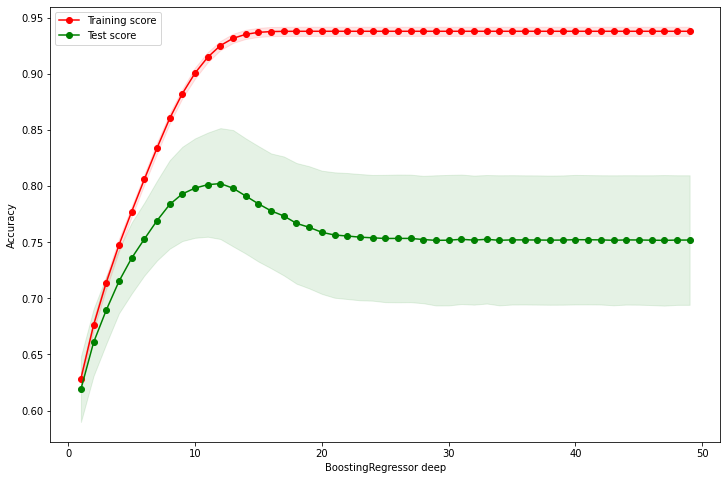

In [47]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, boosting_train_scores_mean - boosting_train_scores_std,
                 boosting_train_scores_mean + boosting_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, boosting_test_scores_mean - boosting_test_scores_std,
                 boosting_test_scores_mean + boosting_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, boosting_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, boosting_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('BoostingRegressor deep')
plt.show()

La grafica mostrada arriba nos muestra la curva de validacion , en la cual podemos ver lo cerca que estan nuestros modelos de hacer una prediccion cercana a la ideal.

Es decir el aproximadamente 80% de puntaje obtenido se veria de esa forma donde observando la diferencia entre el puntaje en train y score es poca comparando la forma que deberiamos obtener, un punto a destacar es que esta curva corresponde al modelo de **BoostingRegressor** pero si pudieramos graficar de la misma manera VootingRegressor veriamos una curva parecida.(La grafica se hizo de tal forma que modificabamos la profundidad para asi graficar el comportamiento del modelo con los datos datos.)

### Comparacion Regresor V1.0

#### ¿Que diferencias hay respecto a la primera version de este modelo?
Recordadno la version 1.0 de este preditor la cual se hizo con este mismo dataset pero con otros procesos de datos distintos, nos arrojaba diferentes resultados debido al modelo implementado y a el ***tratamiento de los datos***, tomando mas peso esta segunda razon.

A continuacion se implementara el mismo modelo (v1.0) pero con este nuevo conjunto de datos y compararemos si el modelo a mejora con los nuevos datos filtrados, y que puntaje alcanza.

De igual manera implementaremos otro de los modelos para comparar la diferencia entre ellos.

In [21]:
#═══════════════ Models v1.0 ═══════════════
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(x_train, y_train)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [22]:
knn_regressor.score(x_test, y_test)

0.7684339481701714

In [23]:
tree_regressor.score(x_test, y_test)

0.5944306236462126

Comenzando con la comparacion lo primero que podemos ver es el score que en la v1.0 no era nada perfecto ya que en KNN apenas alcanzamos un 56% y en el TreeRegressor solo obteniamos un 55%, siendo estos los dos mas altos, ahora usando este nuevo conjunto de datos ya filtrado y transformado se puede observar una buena mejoria en en uno de los modelos y en otro tambien hay algo de mejora.

- KNN v1.0 56.5% ------------------------- KNN v2.0 76.8%
- TreeRegrssor v1.0 55.7% ---------------- TreeRegressor v2.0 59.4%


#### Cross-Validation en modelo v1.0

Anteriormente hicimos una evaluacion diferente de estos modelos donde trazabamos curvas y comparabamos con nuestros datos de train y test que tan acertado era el modelo pero esta vez usaremos los datos completos de nuestro modelo para probar nuestros modelos y observar un puntaje mas cercano a la realidad.

In [27]:
knn_scores = cross_val_score(knn_regressor,scaler_X_data,Y.ravel(), cv=10)
print()

In [28]:
tree_scores = cross_val_score(tree_regressor,scaler_X_data,Y.ravel(), cv=10)

In [30]:
print("KNN Regressor: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))
print("Tree Regressor: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))

KNN Regressor: 0.72 (+/- 0.13)
Tree Regressor: 0.57 (+/- 0.06)


Como observamos, nuestro score disminuyo un poco per aun el modelo anterior elegido (KNN) permace con un buen puntaje que es aun mayor al de la version 1.0, sin embargo el TreeRegressor volvio a un valor muy similar al que obtuvimos en su version 1.0

### Comparando con modelos usados en v2.0
Habiendo evaluado los antiguos moelos y comparandolos con los nuevos podemos notar varias diferencias en los resultados:

- 1)Tratamiento de datos:
    En esta version 2.0 se usaron nuevas funciones para optimizar lo maximo posible los datos que teniamos de tal forma que los     datos que teniamos se autaban de mejor forma a los modelos que implementariamos, por ejemplo el escalar los datos para que     estos fueran mas faciles de utilizar por serparada en el moedlo KNN y RandomForestRegressor y asi obtener mejores        resultados individualemnte y al hacer un ensamble el resultado fuera mucho mejor.
    
    
- 2)Modelos implementados:
   No existen malos modelos, solo hay modelos mejores para cada problema, es decir, aunque en esta ocasion los modelos  implementados en la v1.0 no fueron tan buenos como los usados ahora no significa que sean malos ino que en esta aplicacion fue  otra forma la que nos acerca mas al resultado deseado.
   
    No seria una comparacion justa ya que se usaron otros metodos para tratar los datos por lo cual los resultados fueron   distintos, ademas de que en esta ocasion un ensamble podriamos decir que es como si trabajaramos con alguien de "dos cabezas"   debido a que mientras nuestro antiguo modelo solo podia obtener un tipo de resultados, ahora podemos obtener mas de un    resultado y comparalos paa despues se hagan correciones y se pondere la solucion.
    
    
- 3)Evaluaicion de modelos:
    Anteriormente evaluabamos nuestros modelos con los mismos datos de entrenamineto y test lo cual si bien nos da una buena estimacion, esta podria mejorar arrojando datos ma reales como en esta version donde se implemento el Cross-Validation y de esa maner ver que tan buenos eran nuestros modelos con algo mas parecido a la realidad.
    
### Eleccion de Modelo
Una vez comparados tanto nuestros modelos 2.0 y los antiguos modelos 1.0 y todos sus cambios, ajustes y aditamentos podemos tomar una decision respecto al modelo elegido en esta version 2.0.

Mirando los train, test y scores respectivos, podemos decir que podria haber un empate entre ***Boosting Regressor*** y ***Voting Regressor*** donde apenas por poco **Voting Regressor** nos da el mejor resultado pero no es nada que haciendo mas ajustes en algunos hiperparametros, o estimadores no puedan arreglar.

## Interpretacion de Modelos
- ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no?
    Las variables que mas ayudaron a nuestro predcitor fueron las hallas en nuestra matriz de correlacion 
    - rooms
    - bedrooms
    - bathrooms 
    - surface_total
    - surface_covered
    
    Estas variables ademas de nuestros "datos resultado" (el precio) fueron el pilar para despues entrenar los modelos y evaluar su desempeño.
    
- ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?
    Nuestros errores estan aun en un rango aceptable, es decir ,no hay rastro de **overfiting** o **underfitting** demasiado notable, como pudimos apreciar en la grafica de boosting regressor, tenemos una curva muy similar a la esperada. lo cual es señal de que tenemos un buen error y el modelo puede entender la relacion de los datos de entrada y salida.
    
    Algo mas a agregar es que al hacer la validacion cruzada estamos exponiendo el modelo a un entorno parecido al de la realidad dandole datos siferentes a train y test, viendo asi un comportamineto mas realista.

## Conclusion
¿Se cumplieron los objetivos?
En efecto cumplimos los objetios propuestos en este proyecto los cuales eran :

    - Optimizacion del modelo o cambio de este (Mejores resultados al predecir)
    - Mejoras en nuestros datos (Modificacion del dataset para tener resultados mas precisos)
    - Exploracion de nuevos errores al mejorar el modelo
    
Como se muestra en el proyecto hicimos una mejora a nuestro modelo anterior de tal forma que los transformamos en uno nuevo al hacer un ensamble con VotingRegressor agregando RandomForestRegressor y mejorando los resultados.

Vimos una mejora en los datos usados en el dataset, ya que los procedimientos aplicados fueron diferentes pero mejores para nuestros modelos ya que esto les aregaba un extra, dandoles mas relacion entre la entrada y salida mejorando asi los resultados.

En esta segunda version pudimos implementar una version mejorada de nuestro modelo v1.0 con lo que encontramos algunos problemas al buscar los mejores hiperparametros a optimizar y tambien al ver los resultados ya que se buscaba tener una mejora, lo cual logramos pero tomo tiempo y diversas pruebas con el codigo.